<a href="https://colab.research.google.com/github/singhsourav0/Deep-Learning-Odyssey/blob/main/DogvsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font color="cyan">Dogs and Cats Classfication from self Training.</font></h1>
<p><font color="teal">This notebook demonstrates training a model to classify images of dogs and cats using a Kaggle dataset. Training with over 1 GB of image data can be resource-intensive, requiring significant storage space. To mitigate this issue, we employ a Keras generator. This generator functions by feeding data to the model in batches, thereby conserving memory. It loads a portion of the dataset, processes it, and then proceeds to load subsequent portions, optimizing memory usage. </br></br>
However, during training, we encountered overfitting issues, where the model performed well on the training data but poorly on unseen data. To address this, we implemented techniques such as Batch Normalization and Dropout. Batch Normalization helps stabilize training by normalizing the inputs of each layer, making optimization more efficient. Dropout randomly deactivates a certain percentage of neurons during training, preventing overreliance on specific features and encouraging the model to generalize better.</br></br>
After incorporating these strategies, the model demonstrated improved performance in predicting outcomes, showcasing the effectiveness of these regularization techniques in combating overfitting.</font></p></br>


<h3><font color="yellow"><b>Sourav kumar(singhsourav0)</font>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:10<00:00, 129MB/s]
100% 1.06G/1.06G [00:10<00:00, 108MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('./content')
zip_ref.close()

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, BatchNormalization, Dropout

In [8]:
#generator of keras to train our model from dog and cat image
train_dset = keras.utils.image_dataset_from_directory(
    directory = '/content/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),
)

validation_dset = keras.utils.image_dataset_from_directory(
    directory = '/content/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256),


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalize
def process(image, label):
  image =tf.cast(image/255.,tf.float32)
  return image, label

train_dset = train_dset.map(process)
validation_dset = validation_dset.map(process)

In [10]:
#create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size =(3,3),padding = 'valid', activation = 'relu',input_shape = (256, 256,3)))
model.add(MaxPooling2D(pool_size =(2,2),strides =2, padding = 'valid'))

model.add(Conv2D(64, kernel_size =(3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2, padding = 'valid'))

model.add(Conv2D(128, kernel_size =(3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation ='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
hist = model.fit(train_dset, epochs = 10, validation_data=validation_dset)

Epoch 1/10
625/625 [==============================] - 61s 84ms/step - loss: 0.6650 - accuracy: 0.6130 - val_loss: 0.5719 - val_accuracy: 0.7052
Epoch 2/10
625/625 [==============================] - 53s 84ms/step - loss: 0.5330 - accuracy: 0.7303 - val_loss: 0.4954 - val_accuracy: 0.7592
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4041 - accuracy: 0.8122 - val_loss: 0.5011 - val_accuracy: 0.7828
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2451 - accuracy: 0.8964 - val_loss: 0.6066 - val_accuracy: 0.7792
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1293 - accuracy: 0.9507 - val_loss: 0.8450 - val_accuracy: 0.7564
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0883 - accuracy: 0.9707 - val_loss: 1.1204 - val_accuracy: 0.7414
Epoch 7/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0594 - accuracy: 0.9810 - val_loss: 1.3495 - val_accuracy:

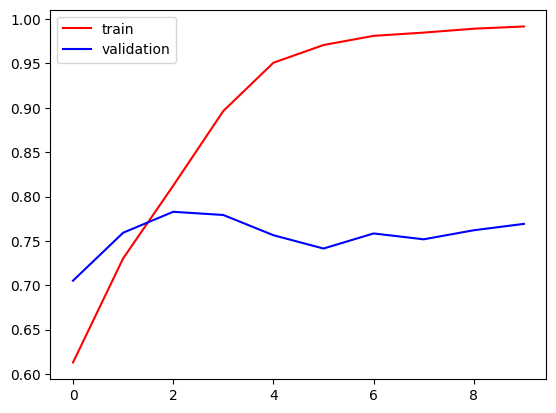

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],color='red',label='train')
plt.plot(hist.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

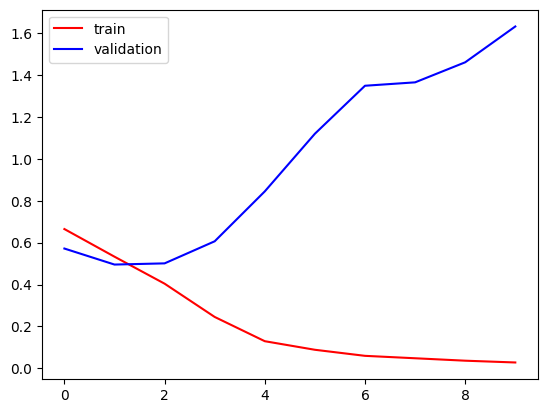

In [17]:
plt.plot(hist.history['loss'],color='red',label='train')
plt.plot(hist.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()



<div style="background-color: #f3d9c6; padding: 10px; font-family: Arial, sans-serif;">
  <h1 style="color: #7e4a27; font-weight: bold;">Reduce Overfit</h1>
  <p style="color: #7e4a27;">Now, we can clearly see from plot our model is overfit. so, we decide to reduce overfit and the technique to reduce overfiting is elow and i will use some of them to reduce overfiting.</p>


<h3 style="color: #7e4a27; font-weight: bold;">ways to reduce overfitting:</h3>
  <ol style="color: #7e4a27;">
    <li>Add more data</li>
    <li>Data Augmentation</li>
    <li>L1/L2 Regularizer</li>
    <li>Dropout</li>
  </ol>
</div>


In [22]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_dset,epochs=10,validation_data=validation_dset)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.1194 - accuracy: 0.6208 - val_loss: 0.6797 - val_accuracy: 0.6110
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 0.5419 - accuracy: 0.7304 - val_loss: 0.5622 - val_accuracy: 0.7048
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4675 - accuracy: 0.7797 - val_loss: 0.5307 - val_accuracy: 0.7458
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4003 - accuracy: 0.8159 - val_loss: 0.4562 - val_accuracy: 0.8060
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3526 - accuracy: 0.8468 - val_loss: 0.5075 - val_accuracy: 0.7800
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2632 - accuracy: 0.8881 - val_loss: 0.5051 - val_accuracy: 0.7954
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.1809 - accuracy: 0.9268 - val_loss: 0.6602 - val_ac

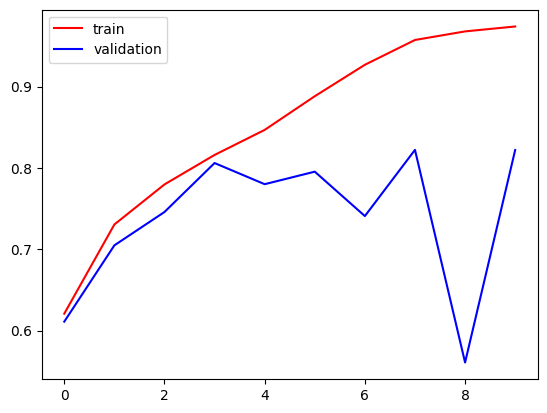

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

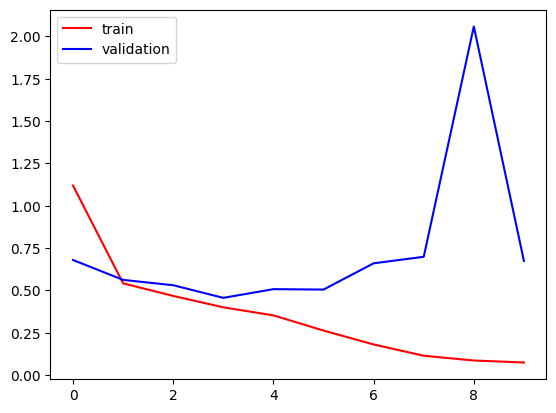

In [27]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

<div style="background-color: #f3d9c6; padding: 10px; font-family: Arial, sans-serif;">
  <p style="color: #7e4a27;">Now, we can clearly see from plot our model is reduce lot of overfiting. so, we decide to test on the real image data to validate</p>


In [29]:
import cv2

In [30]:
test_img = cv2.imread('/content/cat-test.jpg')

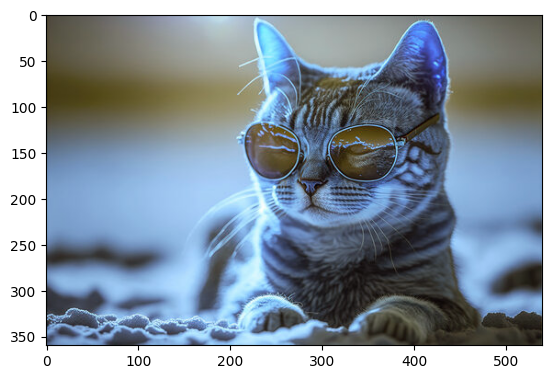

In [31]:
plt.imshow(test_img)

In [33]:
test_img.shape

(360, 540, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 449ms/step


array([[0.]], dtype=float32)

In [37]:
prediction = model.predict(test_input)
if prediction[0][0] == 0:
  print("cat")
else:
  print("dog")


1/1 [==============================] - 0s 18ms/step
cat


In [56]:
test_img = cv2.imread('/content/dog.jpeg')

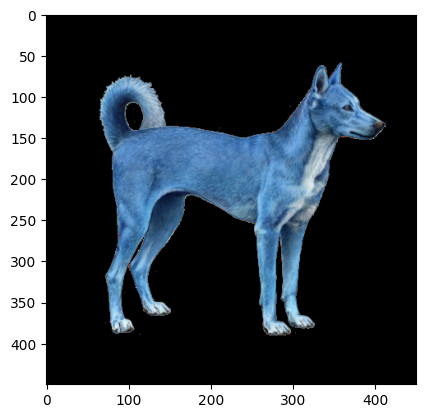

In [57]:
plt.imshow(test_img)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [59]:
test_input = test_img.reshape((1,256,256,3))

In [60]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [61]:
prediction = model.predict(test_input)
if prediction[0][0] == 0:
  print("cat")
else:
  print("dog")


1/1 [==============================] - 0s 24ms/step
dog
